# Part 1: Tabular Q-Learning
## Reinforcement Learning

* In reinforcement learning the goal is to find a policy $\pi$ that obtains the biggest reward (or lowest cost) from a determined environment $\rightarrow$ **Optimal control problem**

    * The reward is, in general, a scalar function that changes given a state $s_t$ ($x_t$) and an action $a_t$ ($u_t$) and comprises that what wants to be optimized by the policy


* In reinforcement learning the policy is supposed to be applied to an **stochastic environment** $\rightarrow$ **Given an action there is not complete certainty of landing in a determined state**

    * For example, throw a ball from the top of a hill which is affected by winds and observe the position to which it arrives at the bottom of said hill.
        * The winds are part of the environment you are interacting with, and are by nature stochastic
    * Can you, with complete certainty, determine where the ball will land given that you throw it with a known force ?
    
    
* The stochastic environment is supposed to be **markovian**, i.e., the following condition holds for its **dynamics**
$$P(s_t| s_{t-1}, a_{t-1} ) = P(s_t| s_{t-1}, a_{t-1}, s_{t-2}, a_{t-2}, \cdots)$$


* With these assumptions the RL setup considers the policies to be acting on a **Markov Decision Process(MDP)**. The MDP is a tuple of the form: $(S,A,P,r)$, where:
    * $S$ denotes the set of states of the environment.
    * $A$ denotes the set of actions that the agent can execute.
    * $P$ denotes the state-transition probabilities of the environment.
    * $r$ denotes the reward function that the agent recieves from the environment.

<img src="https://raw.githubusercontent.com/jpmartinez10/RL-tutorial/master/numpy-based/imgs/MDP.png" style="width: 400px;">

Under the **MDP** framework we can summarize the agent-environment interaction as shown in the figure.  
* The agent takes an action $a_t$ at the state $s_t$. 
* This taken action drives the agent to state $s_{t+1}$ with certain probability.
* Once the agent reaches the state $s_{t+1}$ it receives a reward $r_{t+1}$ from the environment.

Now, due to the stochastic nature, the actual reward is not what we want to optimize. Instead, we want to optimize expectation functions of the reward so that we consider such stochasticity. 

<center><strong>We will be studying the Q-function</strong></center>

## The Q-function
Expresses how well it is to act with an action $a$ given that the system is in state $s$. The "wellness" is expressed in terms of the expected total reward to be received by acting with a policy $\pi$.

$$Q_{\pi}(s, a) = E_{\pi}\left[\sum_{k=0}^{\infty}\gamma^kr\left(s_{t+k}, a_{t+k}\right)\ \bigg|\ s_t = s, a_t = a\right]$$



* It follows a **Bellman expectation equation**:
    $$ Q_{\pi}(s,a)= \sum_{s_{t+1}, r(s_t,a_t)}P\left(s_{t+1}, r(s_t, a_t)| s_t=s, a_t=a\right)\left[r(s_t,a_t)+\gamma\sum_{a_{t+1}}\pi(a_{t+1}|s_{t+1})Q_{\pi}(s_{t+1},a_{t+1})\right]$$
    <p>
        <img src="https://raw.githubusercontent.com/jpmartinez10/RL-tutorial/master/numpy-based/imgs/qbackup.png" style="width: 280px;"/>
        <center><em>Taken from Sutton, R. S., & Barto, A. G. (1998). Introduction to reinforcement learning<br>(Vol. 135). Cambridge: MIT press.</em></center>
    </p>
* And in optimality, $Q_{*}(s,a)\equiv max_\pi Q_{\pi}(s,a)\ \forall s,a$, the **Bellman optimality equation**

$$\large Q_{*}(s,a)= \sum_{s_{t+1}, r(s_t,a_t)}P\left(s_{t+1}, r(s_t, a_t)| s_t=s, a_t=a\right)\left[r(s_t,a_t)+\gamma\ max_{a_{t+1}} Q_{*}(s_{t+1},a_{t+1})\right]$$

### A gridworld environment

In order to build some intuition about RL methods, we are going to begin with a value-based method: Q-learning. To keep things simple we are going to implement Q-learning in its tabular form (i.e. without any function approximation).

The first environment that we are going to study is a discrete-space grid-world. We begin by importing all the required python modules.

In [1]:
import numpy as np                                      # numpy is for math operations.
import matplotlib.pyplot as plt                         # matplotlib.pyplot is to make plots.
from envs.environments import grid_world                # The grid_world environment.
from agents.Qlearning import tabular_Qlearning          # The RL agent (tabular Q-learning).
from utilities import plot_policies, plot_trayectory    # Pre-made functions to plot policies and trayectories.
from utilities import print_actions_taken               # Pre-made function to print a log with the actions taken.

Now we create an instance of the environment, which we call "env", and we render the environment to see what we are dealing with.

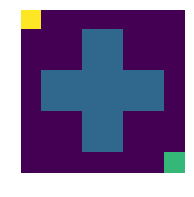

In [2]:
%matplotlib inline

env = grid_world()                  # Creates an environment instance called "env".
env_map = env.get_map()             # Generates an image with the map of the environment.

plt.figure(figsize=(3,3));          # These 3 are matplotplib functions that display the map of the environment.
plt.imshow(env_map);                #
plt.axis('off');                    #

The agent (yellow) is going to be trained to achieve the goal cell (green). The obstacles (blue) are places where the agent cannot move to.

The agent can execute 4 actions: 0-UP, 1-RIGHT, 2-DOWN, 3-LEFT. Each action moves the agent one cell in the corresponding direction. If the agent attemps to move towards an obstacle or a limit of the gridworld, it will remain at its current position.

The state representation of this environment is the number of the cell where the agent is (i.e 0,1,2...63).

To interact with the environment object "env", we are going to call the following functions:

### env.step(): 
* **Input:** action. 
* **Output:** next state, reward and done (boolean flag to indicate terminal state). 
* **Function:** move the agent one cell in the direction given by the action (i.e. 0-UP, 1-RIGHT, 2-DOWN, 3-LEFT)

### env.reset():
* **Input:** a boolean flag to start at random positions (optional).
* **Output:** state. 
* **Function:** resets the environment.

### env.render():
* **Input:** none. 
* **Output:** the map of the environemt. 
* **Function:** renders the map of the environment.

As an example, lets run the environment for 20 steps taking random actions.

<IPython.core.display.Javascript object>


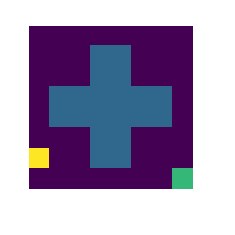

Step: 1    Action taken: DOWN
Step: 2    Action taken: DOWN
Step: 3    Action taken: LEFT
Step: 4    Action taken: DOWN
Step: 5    Action taken: LEFT
Step: 6    Action taken: DOWN
Step: 7    Action taken: LEFT
Step: 8    Action taken: RIGHT
Step: 9    Action taken: DOWN
Step: 10    Action taken: RIGHT
Step: 11    Action taken: UP
Step: 12    Action taken: DOWN
Step: 13    Action taken: UP
Step: 14    Action taken: DOWN
Step: 15    Action taken: LEFT
Step: 16    Action taken: LEFT
Step: 17    Action taken: LEFT
Step: 18    Action taken: LEFT
Step: 19    Action taken: DOWN
Step: 20    Action taken: UP


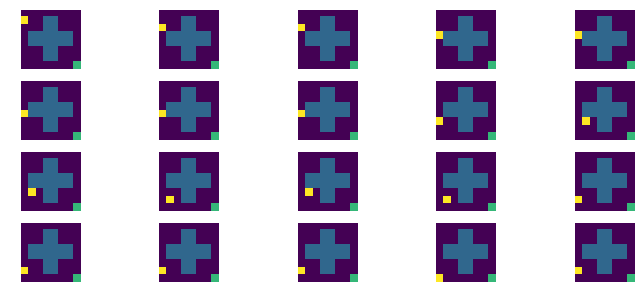

In [3]:
%matplotlib notebook

trayectory = []                     # Empty python list to save trayectory.
actions = []                        # Empty python list to save actions taken.

env = grid_world()                  # Creates an environment instance called "env".
env.reset()                         # Resets the environment.
for i in range(20):
    action = np.random.randint(0,4) # Generates a random int between 0 and 3 (4-1).
    env.step(action)                # Takes the action (moves the agent). 
    env_map = env.render()          # Renders the current map of the environment.
    
    trayectory.append(env_map)      # Adds the current map to the trayectory list.
    actions.append(action)          # Adds the taken action to the list.

    
%matplotlib inline

print_actions_taken(actions)
plot_trayectory(trayectory,size=(12,5))

## How to train the agent?

As we mentioned before, the agent (yellow) is going to be trained to acheieve the goal cell (green). To train it we are going to use the tabular version of the Q-learning algorithm:

###  The Q-learning algorithm
#### The algorithm explained

* The Q-learning algorithm is an iterative algorithm that seeks to learn the optimal "Quality" function $Q_{*}(s,a)$.


* To achieve such goal it iterates over the **Bellman optimality equation for the $Q$-function** trying to find a fixed point, i.e, a solution to said equation. 


* It starts with an initial estimate for $Q_{*}$ and updates it in the direction of the estimation error (Belman Error BE) 

    * The **sample estimation error for the Bellman optimality equation** characterizing the $Q_{*}$-function is given by
    
    $$\large  BE_* = \color{red}{r(s_t,a_t)+\gamma\ max_a Q(s_{t+1}, a)}  - \color{blue}{Q(s_{t},a_t)}$$ 
    
        * *In red*: Estimate with new information gathered from the environment, $r(s_t,a_t)$, but using the current estimation obtained with previous experience (bootstraping).
        * *In blue*: The current estimate
        
    * The upate is then done by steping in the direction of such sample error with a step size $\alpha$ (learning rate)
    
    $$\begin{align}
        \large Q(s_t,a_t)&\large\leftarrow Q(s_t,a_t) + \alpha BE_* \\
                &\large\boxed{ \leftarrow  Q(s_t,a_t) + \alpha\left[\color{red}{r(s_t,a_t)+\gamma\ max_a Q(s_{t+1}, a)}  - \color{blue}{Q(s_{t},a_t)}\right]}
       \end{align}
    $$
    
    
* At the end one wishes to update the initial estimate of the Q-function for **all the states and actions**. 
    * To do so one then has to **explore those states and actions** (by interacting with the environment) and use the Q-learning update rule so that the fixed point is found $\forall s \in S, a\in A$ for the optimality equation
    * The exploration is done with **an stochastic policy $\pi$ that has not-vanishing probability for the different actions given some state**.

#### Tabular Q-learning
<img src="https://raw.githubusercontent.com/jpmartinez10/RL-tutorial/master/numpy-based/imgs/Qlearning.png">



**In our especific example with the grid_world environment:**
* $S$ is the set of cells of the grid_world enviroment. In our example $|S|=64$ because the grid_world has dimensions of $8\times8$
* $A$ is the set (0,1,2,3) of actions that the agent can execute (moving up, left, down or right).
* $P$ is the transition function from one cell to another given an action. **In our case this is a deterministic function of the environment and is unknown to the agent.**
    * Because it is deterministic the Bellman optimality equation is then reduced to
    
    $$\large Q_{*}(s,a)= r(s_t,a_t)+\gamma\ max_{a_{t+1}} Q_{*}(s_{t+1},a_{t+1})$$
    
    * Thus, the update is not just a sample to approximate the expectation
     

* $r$ is a scalar function that has to reinforce the desired behavior of the agent. We are going to define this function later.

* Here, the **exploration policy** is an $\epsilon$-greedy policy that chooses with probability $\epsilon$ a random action from $A$ and with probabilit $1-\epsilon$ the action that maximizes the current estimate for $Q$ at a given state.

## The agent class

In order to save some time and focus on the fundamentals of Q-learning, we have already coded an agent class in python.

The agent class initializes a Q-table with $|S|$ rows and $|A|$ columns and all entries in $0$ and has the following methods already implemented:

* greedy(): takes an state as input and returns an action being greedy with the current Q-values.
* epsilon_greedy(): takes an state as input and returns a random action with epsilon probability or a greedy action with (1-epsilon) probability.
* epsilon_decay(): exponentially decays the exploration parameter epsilon (i.e. epsilon = decay$*$epsilon with decay<1)

## Q-learning algorithm (main code)

In [4]:
def run_Qlearning(env,agent,max_episodes,max_steps,exp_decay,start=False,seed=1234):
    np.random.seed(seed)                                           # Fixed random seed for reproducibility.
    
    agent.reset()                                                  # Initializes agent. Creates Q-table with zeros.
    
    policies = []                                                  # Creates an empty python list to save the policies.
    
    for episode in range(max_episodes+1):                          # Iterates over the number of episodes.
        state = env.reset(start)                                   # Resets the environment.
        done = False                                               # The done flag starts as False.
        step = 1                                                   # Step counter starts at 1.
        policies.append(agent.get_policy())                        # Adds current policy to the policies list.
        
        while (not done and step <= max_steps):                    # While loop for current episode.
            action = agent.epsilon_greedy(state)                   # Agent selects an action with epsilon-greedy policy.
            next_state,reward,done = env.step(action)              # Agent takes the selected action.
            agent.train(state,action,next_state,reward,done)       # Agent trains (updates Q-table entry).
            
            state = next_state                                     # Updates the current state.
            step += 1                                              # Increments the step counter in 1.
            
        agent.epsilon_decay(rate=exp_decay,min=0.1)                # Reduces the exploration parameter epsilon.
        
        if(episode%(max_episodes/10)==0):                          # This prints some information of the training process
            print('Episode: ',episode,' Steps: ',step,
                  ' Exploration: ',np.round(agent._epsilon,2))
            
    return policies                                                # The function returns the policies list.

## Implementing the agent.train() function

In order to understand Q-learning, we are going to implement the train function of our tabular_Qlearning agent.

This function performs the update:
\begin{equation}
    Q(s_t,a_t) = Q(s_t,a_t) + \alpha\bigg[r_{t+1} + \gamma\max_{\hat{a}}Q(s_{t+1},\hat{a}) - Q(s_t,a_t) \bigg]  
\end{equation}

To implement only this function we are going to create an instance of the tabular_Qlearning class and override the train method.

In [5]:
class our_Qlearning(tabular_Qlearning):          # This is a subclass of tabular_Qlearning and is called: our_Qlearning.
    
    def train(self,state,action,next_state,reward,done):  # Takes as input: state, action, next_state, reward, and done.
               
        if (not done):                                    # If the next_state is not a terminal state.
            maxQ = np.amax(self.Qtable[next_state,:])     # Maximization over actions.
            BE = reward + self._gamma*maxQ- self.Qtable[state,action] # Bellman error.
        else:
            BE = reward - self.Qtable[state,action]       # Bellman error.
        self.Qtable[state,action] += self._alpha*BE       # Table update (alpha denotes the learning rate).
        return 0.5*np.square(BE)                          # Returns half of the squared Bellman error. 

## Defining the reward function

As we mentioned before, the reward function of the environment is a scalar function that has to reinforce the desired behavior of the agent. In our case we want the agent to achieve the goal cell. To do so we are going to define two different reward functions:

#### Reward 1
\begin{equation}
    R(s) = 
        \begin{cases}
        +1, \text{    if the agent's cell is the goal cell.}\\
        0, \text{    otherwise.}
        \end{cases} 
\end{equation}

#### Reward 2
\begin{equation}
    R(s) = 
        \begin{cases}
        +1, \text{    if the agent's cell is the goal cell.}\\
        -1, \text{    otherwise.}
        \end{cases} 
\end{equation}

Notice that both rewards reinforce the behavior of moving towards the goal cell. However, the second reward gives a penalty for every state before the goal is achieved. As we will see, this penalty encourages the agent to achieve the goal as fast as possible.

In order to define these two reward functions, we are going to create two subclasses of the environment class "grid_world", and define a different reward function in each one.

In [6]:
class grid_world_v1(grid_world):        # The first subclass is called: grid_world_v1.

    def reward(self):
        agent, target = self.observe()  # This function belongs to the grid_world class.
        if agent==target:
            return 1.0
        else:
            return 0.0
    
class grid_world_v2(grid_world):        # The second subclass is called: grid_world_v2.       
    
    def reward(self):
        agent, target = self.observe()  # This function belongs to the grid_world class.
        if agent==target:
            return 1.0
        else:
            return -1.0

# Lets run some experiments!

In order to explore the Q-learning algorithm lets run some experiments. For each experiment, set the parameters of the **Train the agent** cell as shown and then try to answer the question. After training, run the **Test the agent** cell to see the behavior learned by the agent.

#### Experiment 1
* env = grid_world_v1()
* max_eps = 100
* max_steps = 100
* exp_decay = 0.99
* random = False

**Why does the agent fail to solve the environment?**

#### Experiment 2
* env = grid_world_v1()
* max_eps = 100
* max_steps = 200
* exp_decay = 0.99
* random = False

**Can the agent solve the environment from every possible state?**

#### Experiment 3
* env = grid_world_v1()
* max_eps = 500
* max_steps = 200
* exp_decay = 0.99
* random = True

**Is the final policy optimal?**

#### Experiment 4
* env = grid_world_v1()
* max_eps = 500
* max_steps = 200
* exp_decay = 0.90
* random = True

**Why does the agent fail to solve the environment now?**

#### Experiment 5
* env = grid_world_v2()
* max_eps = 500
* max_steps = 200
* exp_decay = 0.99
* random = True

**Is the final policy better than the one of experiment 3? Is it optimal?**



### Train the agent

Episode:  0  Steps:  101  Exploration:  0.99
Episode:  10  Steps:  101  Exploration:  0.9
Episode:  20  Steps:  101  Exploration:  0.81
Episode:  30  Steps:  101  Exploration:  0.73
Episode:  40  Steps:  101  Exploration:  0.66
Episode:  50  Steps:  101  Exploration:  0.6
Episode:  60  Steps:  101  Exploration:  0.54
Episode:  70  Steps:  101  Exploration:  0.49
Episode:  80  Steps:  101  Exploration:  0.44
Episode:  90  Steps:  101  Exploration:  0.4
Episode:  100  Steps:  101  Exploration:  0.36
______________________
UP, RIGHT, DOWN, LEFT


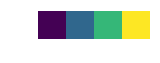

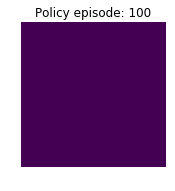

In [7]:
env = grid_world_v1()                                              # Environment instance with the first reward function.
max_eps = 100                                                      # Max number of episodes to train
max_steps = 100                                                    # Max number of steps per episode during training
exp_decay = 0.99                                                   # Exploration parameter decay
random = False                                                    # Flag to use random initial state

agent = our_Qlearning(num_states=64,num_actions=4,lr=0.5)          # Agent as instance of our_Qlearning class.

policies = run_Qlearning(env, agent, max_eps, max_steps, exp_decay, random) # Run the Qlearning algorithm

plot_policies(policies,(1,1))                         # Plot some policies (add (1,1) arg to plot only the last one)

### Test the agent 
#### (runs the learned policy for 5 episodes of 20 steps max)

<IPython.core.display.Javascript object>


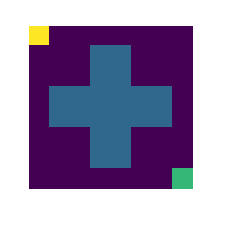

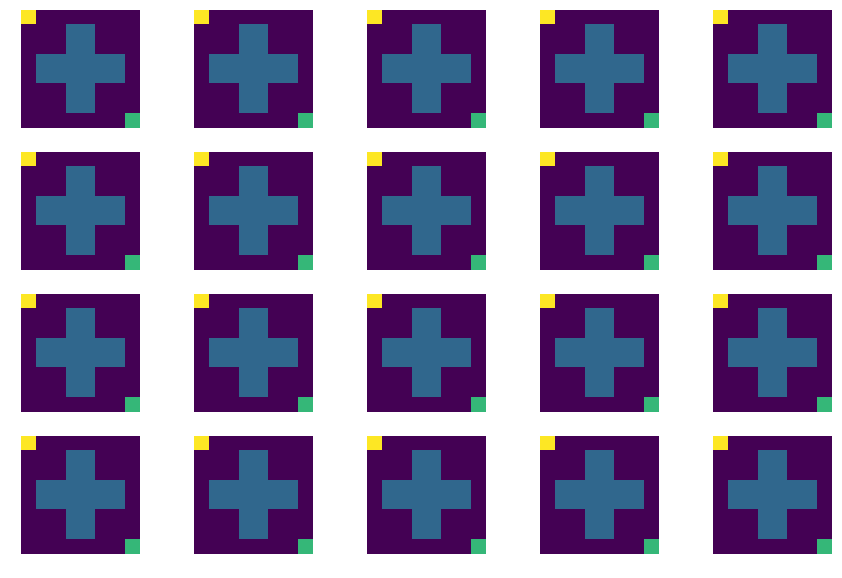

In [8]:
%matplotlib notebook

env = grid_world()                             # Creates a new instance of the environment (required for rendering).

for episode in range(5):                       # Loop over some episodes.
    state = env.reset(random)                  # Reset the environment.
    done = False                               # done flag starts as false.
    step = 1                                   # step counter starts in 1.
    
    trayectory = [env.get_map()]               # Python list to save trayectory of episode.
    while (not done and step < 20):            # Looping until terminal or during max steps.
        action = agent.greedy(state)           # Select action based on greedy policy.
        state,_,done = env.step(action)        # Take selected action.
        env_map = env.render()                 # Render the current map of the environment.
        step += 1                              # Increase step counter by one.
        
        trayectory.append(env_map)
        actions.append(action)

%matplotlib inline

plot_trayectory(trayectory)

# Concluding remarks

* Tabular Q-learning is able to learn the optimal policy if enough training iterations are provided.
* Tabular Q-learning is no able to generalize information. Therefore, in order to solve the environment from every possible state, all states must be visited several times.
* Due to the lack of generalization, tabular Q-learning is not suitable for continuous or very big state spaces.
